## Часть 1. EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('E:/Nikita/Python_Course/Homework_6/archive/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print(df.shape)

(48895, 16)


Удалим из датасета ненужные колонки.

In [5]:
cols_2_drop = ['id', 'name', 'host_id', 'host_name','last_review']
df = df.drop(cols_2_drop, axis=1)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB
None


Сделаем короткое описание признаков для лучшего понимания:
1. neighbourhood_group - боро в Нью-Йорке
2. neighbourhood - район внутри боро(neighbourhood_group)
3. latitude - широта
4. longitude - долгота
5. room_type - тип апартаментов
6. price - стоимость за сутки(?)
7. minimum_nights - количество ночей, на которые можно арендовать помещение
8. number_of_reviews - количество просмотров апартаментов (видимо потенциальными арендаторами)
9. reviews_per_month - среднее количество просмотров апартаментов в месяц
10. calculated_host_listings_count - количество выставленных на сайте объявлений о аренде апартаментов от того или иного владельца
11. availability_365 - количество дней в году, когда недвижимость доступна для брони.

Целевая переменная - price.

Построим график распределения целевой переменной price.

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


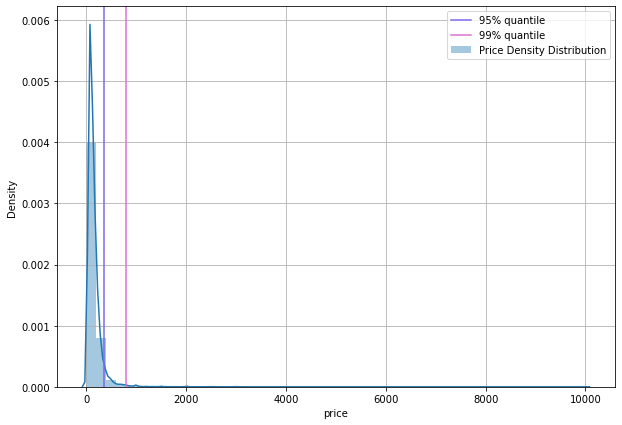

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,7))
sns.distplot(df['price'], label='Price Density Distribution')
plt.axvline(df.price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.price.quantile(0.99), label='99% quantile', c='orchid')
plt.grid(True)
plt.legend()
plt.show()

На графике выше видим тонкий "хвост" за 99 квантилью. Это "выбросы". Имеет смысл удалить эти точки из датасета, т.к. модель не сможет их верно обосновать.

In [8]:
df=df.loc[df.price<df.price.quantile(0.99)]
df.shape

(48403, 11)

В результате, из датасета убрали чуть меньше тысячи объектов (было 48895 стало 47909), что не критично.

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


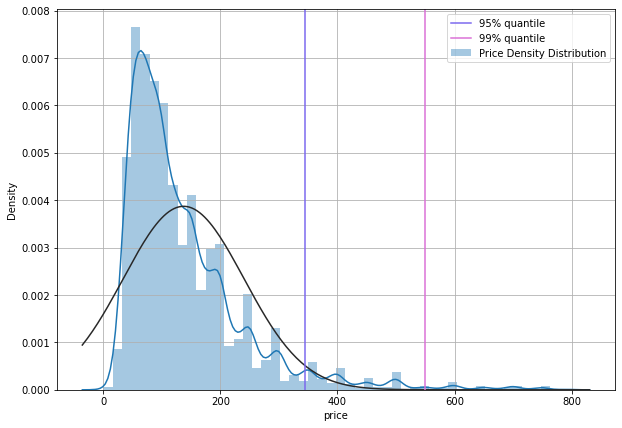

In [9]:
from scipy.stats import norm

plt.subplots(figsize=(10,7))
sns.distplot(df['price'], label='Price Density Distribution', fit = norm)

plt.axvline(df.price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(df.price.quantile(0.99), label='99% quantile', c='orchid')
plt.grid(True)
plt.legend()
plt.show()

Как видим на графике выше, полученное распределение не совсем нормальное - оно скошено, а сама линия не является гладкой, в отличие от нормального распределения. Можно попробовать прологарифмировать значения целевой переменной и посмотреть стало ли лучше.

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


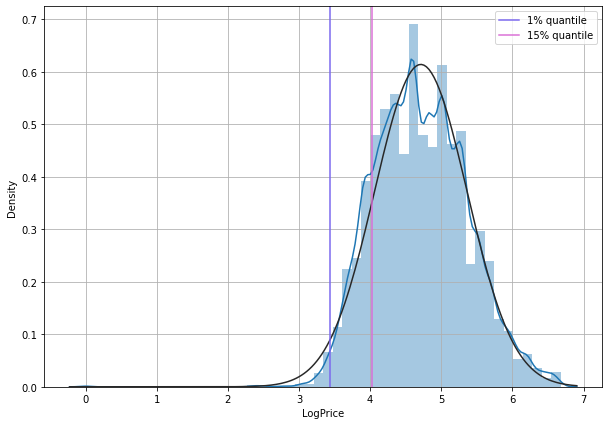

In [10]:

df['LogPrice'] = np.log1p(df.price)

plt.figure(figsize=(10,7))
plt.grid(True)
sns.distplot(df.LogPrice, fit=norm)
plt.axvline(df.LogPrice.quantile(0.01), label='1% quantile', c='mediumslateblue')
plt.axvline(df.LogPrice.quantile(0.15), label='15% quantile', c='orchid')
plt.legend()
plt.show()

In [11]:
df=df.loc[df.LogPrice>df.LogPrice.quantile(0.001)]
df.shape

(48353, 12)

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


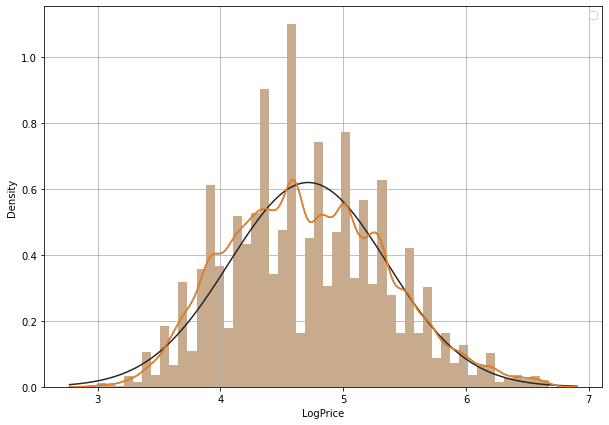

In [12]:
plt.figure(figsize=(10,7))
plt.grid(True)
sns.distplot(df.LogPrice, fit=norm)
sns.distplot(df.LogPrice)
plt.legend()
plt.show()

В результате логарифмирования значений переменной price и очистки датасета от "выбросов", получили распредление данной переменной, максимально приближенное к нормальному. При этом потеря значений равна 48895 - 47861 = 1034.

Теперь посмотрим на распределение цены на дома в зависимости от районов:

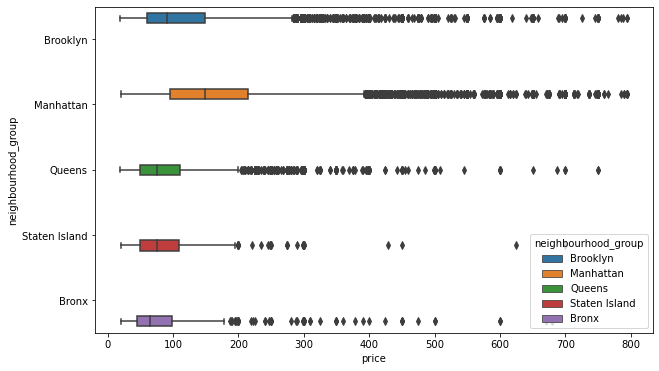

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='price', y='neighbourhood_group', hue='neighbourhood_group')
plt.show()

Из графика выше видно, что самые дорогие апартаменты находятся на Манхэттене. Цена на недвижимость в Квинсе, Стэйтен Айленде и Бронксе примерно одинакова. В Бруклине наблюдается большой разброс по цене - можно снять как дешевые апартменты, по ценам жилья в Квинсе, Стэйтен Айленде и Бронксе, так и дорогие, по ценам жилья в Манхэттене. 
В Бруклине, Манхэттене и Квинсе наблюдается большое количество "выбросов". Похоже, что в каждом из этих районов есть кварталы с элитным жильём и есть кварталы с обычным.

Построим матрицу корреляций признаков.

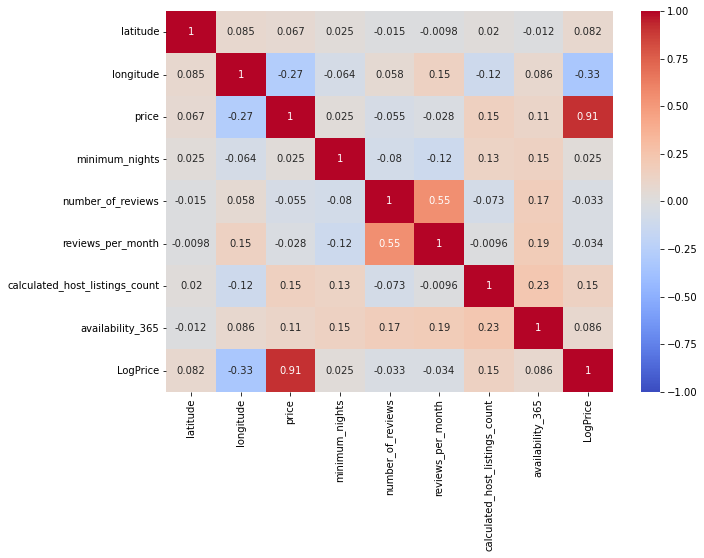

In [14]:
plt.subplots(figsize = (10, 7))
sns.heatmap(df.corr(), cmap = sns.color_palette('coolwarm', 10000), vmin = -1, center =0, annot = True)
plt.show()

Из матрицы корреляций видно, что все признаки, кроме пары number_of_reviews и reviews_per_month, слабо коррелируют между собой.

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48353 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48353 non-null  object 
 1   neighbourhood                   48353 non-null  object 
 2   latitude                        48353 non-null  float64
 3   longitude                       48353 non-null  float64
 4   room_type                       48353 non-null  object 
 5   price                           48353 non-null  int64  
 6   minimum_nights                  48353 non-null  int64  
 7   number_of_reviews               48353 non-null  int64  
 8   reviews_per_month               38543 non-null  float64
 9   calculated_host_listings_count  48353 non-null  int64  
 10  availability_365                48353 non-null  int64  
 11  LogPrice                        48353 non-null  float64
dtypes: float64(4), int64(5), object(

#### Теперь посмотрим, как зависит цена от типа недвижимости.

In [16]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

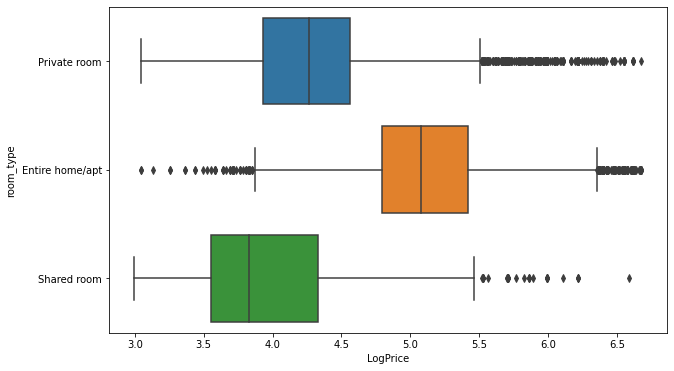

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='LogPrice', y='room_type')
plt.show()

Видим, что цена на отдельную комнату и апартаменты сильно отличается. Цена на отдельную комнату и общую комнату тоже отличается, но не так сильно. В целом, можно сказать, что цена на недвижимость напрямую зависит от её типа, что вполне логично.

#### Теперь можно посмотреть, как цена зависит от количества ночей, на которые можно арендовать жильё.

In [18]:
df.minimum_nights.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
        160,   47,  999,  186,  366,   68,   99,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,   85,   36], dtype=int64)

Для лучшей читаемости графика, усредним значения цены по каждому значению количества ночей, на которые можно арендовать жильё.

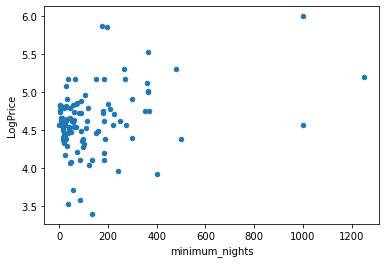

In [19]:
mn_to_LogPrice = df.groupby('minimum_nights')['LogPrice'].mean().reset_index()
mn_to_LogPrice = pd.DataFrame(mn_to_LogPrice)
mn_to_LogPrice.plot.scatter(x='minimum_nights', y='LogPrice');

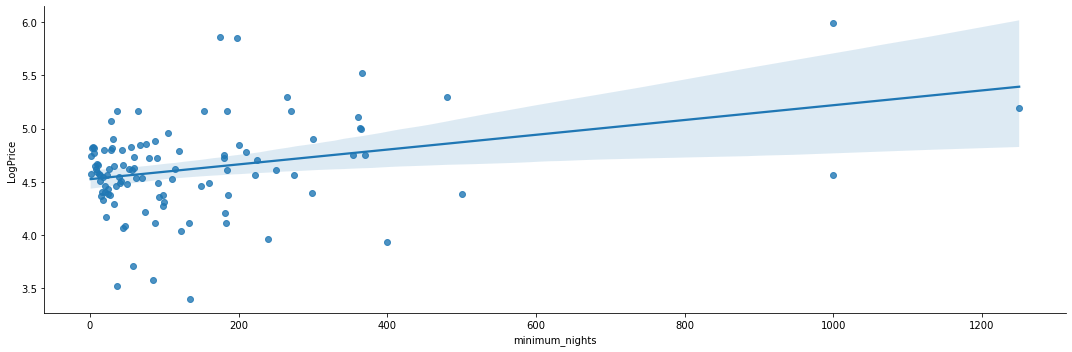

In [20]:
sns.lmplot(data=mn_to_LogPrice, x='minimum_nights', y='LogPrice', aspect=3, height=5)
plt.show()

Из графика выше, можно сделать вывод, что минимальное количество ночей, доступных для аренды, никак не влияет на цену.

#### Выясним, как цена зависит от количества обзоров апартаментов.

Для лучшей читаемости графика, усредним значения цены по каждому значению количества обзора апартаментов.

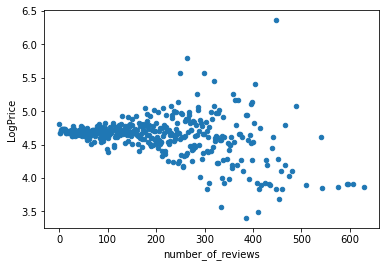

In [22]:
nor_to_LogPrice = df.groupby('number_of_reviews')['LogPrice'].mean().reset_index()
nor_to_LogPrice = pd.DataFrame(nor_to_LogPrice)
nor_to_LogPrice.plot.scatter(x='number_of_reviews', y='LogPrice'); 

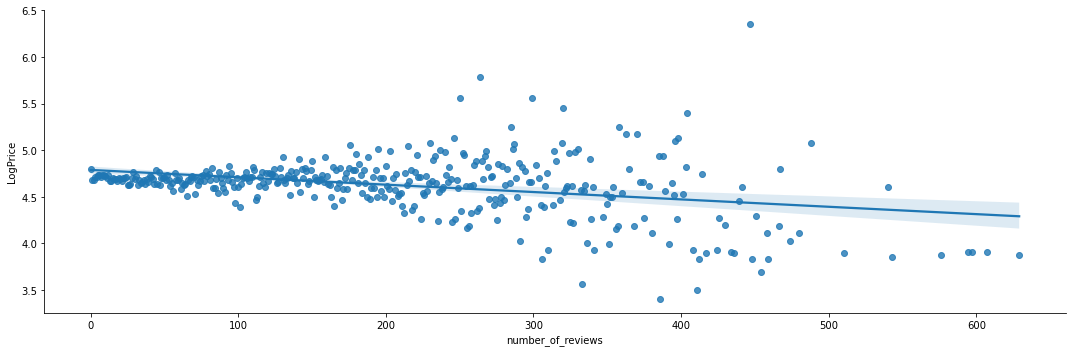

In [23]:
sns.lmplot(data=nor_to_LogPrice, x='number_of_reviews', y='LogPrice', aspect=3, height=5)
plt.show()

Из графика выше видно, что, в целом, цена аренды апартаментов слабо зависит от количества их обзора.

#### Выясним, как количество выставленных на сайте объявлений о аренде апартаментов от того или иного владельца влияет на цену жилья.

In [24]:
df.calculated_host_listings_count.unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,   8,  11,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32], dtype=int64)

Для лучшей читаемости графика, усредним значения цены по каждому значению количества выставленных на сайте объявлений о аренде апартаментов.

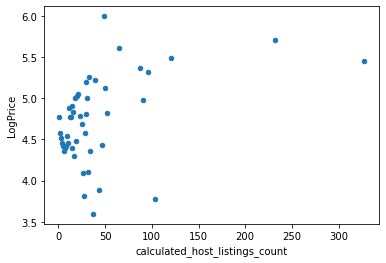

In [26]:
chlc_to_LogPrice = df.groupby('calculated_host_listings_count')['LogPrice'].mean().reset_index()
chlc_to_LogPrice = pd.DataFrame(chlc_to_LogPrice)
chlc_to_LogPrice.plot.scatter(x='calculated_host_listings_count', y='LogPrice'); 

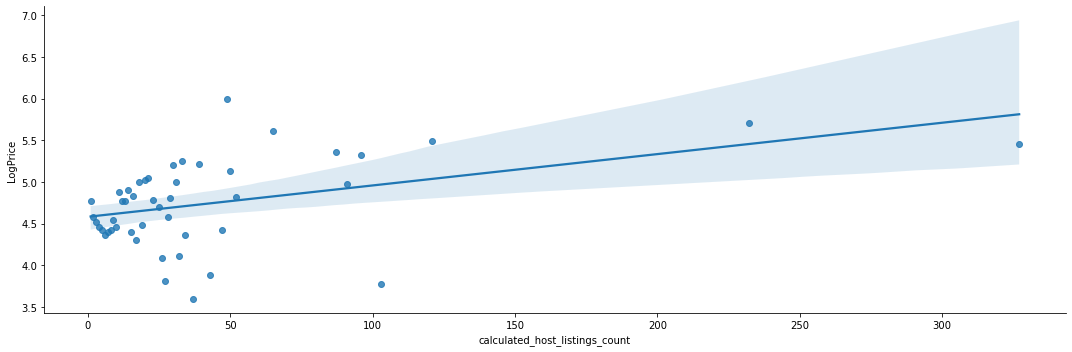

In [27]:
sns.lmplot(data=chlc_to_LogPrice, x='calculated_host_listings_count', y='LogPrice', aspect=3, height=5)
plt.show()

Видно, что в среднем, цена увеличивается при увеличении количества выставленных на сайте объявлений о аренде апартаментов от того или иного владельца.

#### Посмотрим, влияет ли количество дней в году, когда недвижимость доступна для брони на её стоимость.

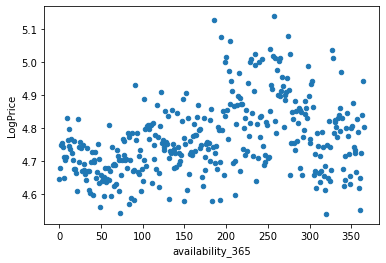

In [29]:
a365_to_LogPrice = df.groupby('availability_365')['LogPrice'].mean().reset_index()
a365c_to_LogPrice = pd.DataFrame(a365_to_LogPrice)
a365_to_LogPrice.plot.scatter(x='availability_365', y='LogPrice'); 

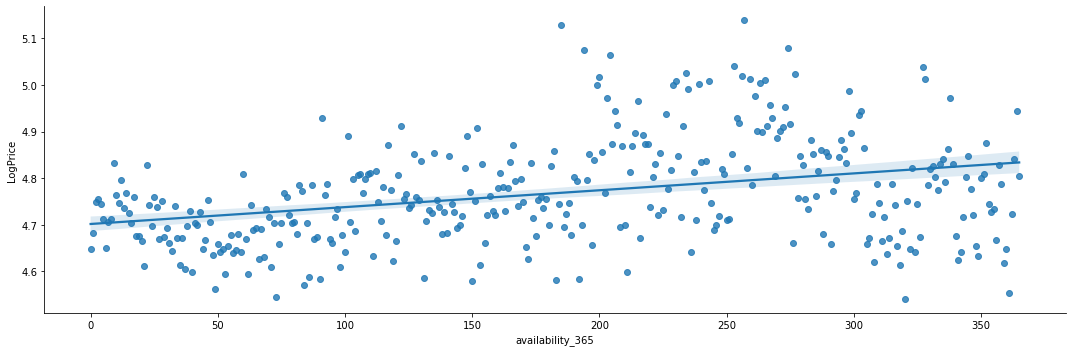

In [30]:
sns.lmplot(data=a365_to_LogPrice, x='availability_365', y='LogPrice', aspect=3, height=5)
plt.show()

## Создаем новый признак!

Будем считать, что самые дорогие квартиры располагаются ближе к центру каждого боро.
Создадим новый признак - расстояние от квартиры, находящейся в одном из боро Нью-Йорка до центра этого боро.

Координаты центра Манхэттена: 40.72833,-73.99417

Координаты центра Бруклина: 40.65083,-73.94972

Координаты центра Куинса:40.7275,-73.79417

Координты центра Стэйтен Айленда: 40.5762806,-74.1448389

Координаты центра Бронкса:40.83722,-73.88611

In [31]:

Manhattan_center_latitude = 40.72833
Manhattan_center_longitude = -73.99417

Brooklyn_center_latitude = 40.65083
Brooklyn_center_longitude = -73.94972

Queens_center_latitude = 40.7275
Queens_center_longitude = -73.79417

Staten_Island_center_latitude = 40.5762806
Staten_Island_center_longitude = -74.1448389

Bronx_center_latitude = 40.83722
Bronx_center_longitude = -73.88611


In [32]:
dist = []
for i, row in df.iterrows():
    if row.neighbourhood_group == 'Manhattan':
        current_dist = np.sqrt((row.latitude - Manhattan_center_latitude)**2 + (row.longitude - Manhattan_center_longitude)**2)
        dist.append(current_dist)
    
    elif row.neighbourhood_group == 'Brooklyn':
        current_dist = np.sqrt((row.latitude - Bronx_center_latitude)**2 + (row.longitude - Bronx_center_longitude)**2)
        dist.append(current_dist)
    
    elif row.neighbourhood_group == 'Queens':
        current_dist = np.sqrt((row.latitude - Brooklyn_center_latitude)**2 + (row.longitude - Brooklyn_center_longitude)**2)
        dist.append(current_dist)
    
    elif row.neighbourhood_group == 'Staten Island':
        current_dist = np.sqrt((row.latitude - Queens_center_latitude)**2 + (row.longitude - Queens_center_longitude)**2)
        dist.append(current_dist)
    
    elif row.neighbourhood_group == 'Bronx':
        current_dist = np.sqrt((row.latitude - Staten_Island_center_latitude)**2 + (row.longitude - Staten_Island_center_longitude)**2)
        dist.append(current_dist)
    

In [33]:
df['distance'] = dist
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LogPrice,distance
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635,0.208418
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535,0.027345
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.017280,0.096141
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810,0.168975
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449,0.086274


In [34]:
df['distance'].max()

0.5013640723067532

In [35]:
dist_list = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4,  0.425, 0.45, 0.475, 0.5]
X_dist= []
Y_log_price = []
for i, row in df.iterrows():
    if np.around(row['distance'], decimals = 3) in dist_list:
        X_dist.append(np.around(row['distance'], decimals = 3))
        Y_log_price.append(row['LogPrice'])

In [36]:
X_dist = pd.Series(data = X_dist)
Y_log_price = pd.Series(data = Y_log_price)
xy_dist = pd.DataFrame(data = X_dist,columns = ['X_dist'])
xy_dist['Y_log_price'] = Y_log_price
xy_dist.head()

,X_dist,Y_log_price
0,0.150,4.394449
1,0.175,4.234107
2,0.200,5.298317
3,0.175,4.174387
4,0.150,4.499810


In [37]:
xy_dist = xy_dist.groupby('X_dist')['Y_log_price'].mean().reset_index()
xy_dist = pd.DataFrame(xy_dist)
xy_dist.head()

,X_dist,Y_log_price
0,0.025,5.184412
1,0.050,5.235162
2,0.075,4.780949
3,0.100,4.513482
4,0.125,4.563806


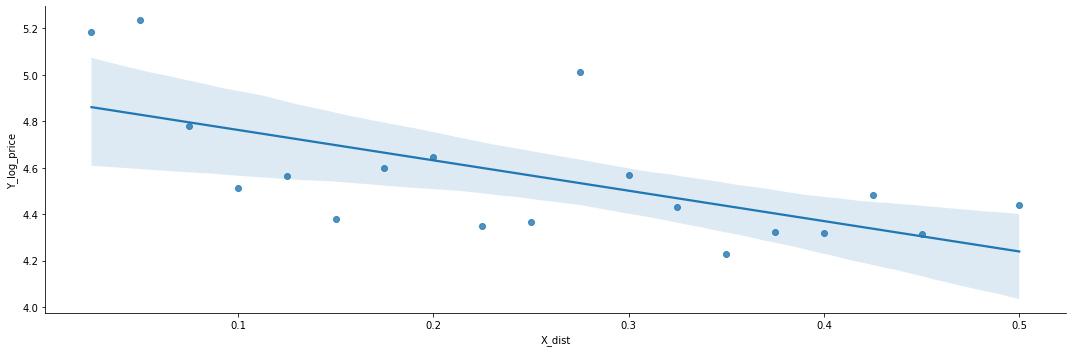

In [38]:
sns.lmplot(data=xy_dist, x='X_dist', y='Y_log_price', aspect=3, height=5)
plt.show()

Видно, что, в среднем, чем ближе жилье к центру района, тем дороже его аренда.

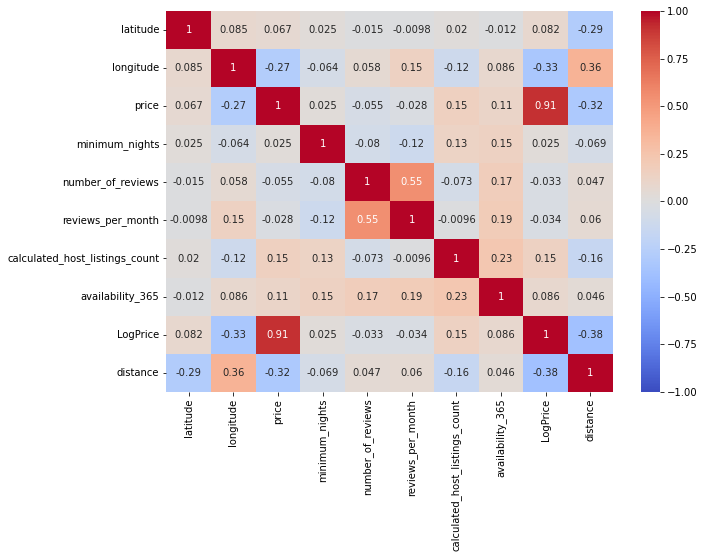

In [39]:
plt.subplots(figsize = (10, 7))
sns.heatmap(df.corr(), cmap = sns.color_palette('coolwarm', 10000), vmin = -1, center =0, annot = True)
plt.show()

Признак distance слабо коррелирует с признаками longitude и latitude.

## Часть 2. Работа с категориальными переменными

Напишем функцию, которая будет применять существующие методы кодирования категориальных переменных к приведенным выше переменным.

In [40]:
def encode_func(data, enc, cols = ['neighbourhood_group', 'neighbourhood','room_type']):
    data_enc = data.copy()
    data_enc[cols] = enc.fit_transform(data_enc[cols])
    return data_enc

### Ordinary Encoder (Однозначное кодирование)

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
df_ordinary_enc = encode_func(data = df, enc = OrdinalEncoder())
df_ordinary_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LogPrice,distance
0,1.0,107.0,40.64749,-73.97237,1.0,149,1,9,0.21,6,365,5.010635,0.208418
1,2.0,126.0,40.75362,-73.98377,0.0,225,1,45,0.38,2,355,5.420535,0.027345
2,2.0,93.0,40.80902,-73.94190,1.0,150,3,0,NaN,1,365,5.017280,0.096141
3,1.0,41.0,40.68514,-73.95976,0.0,89,1,270,4.64,1,194,4.499810,0.168975
4,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,0.10,1,0,4.394449,0.086274


In [43]:
df_ordinary_enc.room_type.unique()

array([1., 0., 2.])

In [44]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [45]:
df_ordinary_enc.neighbourhood.unique()

array([107., 126.,  93.,  41.,  61., 136.,  13.,  94., 201.,  35., 181.,
       208., 213.,  80.,  34.,  51., 150., 215., 102.,  64.,  90.,  28.,
        74., 118., 158., 116., 111., 177., 200., 157., 205., 219.,  31.,
        84.,  76.,  43.,  77.,  19., 188.,  53., 185.,  95.,  73., 165.,
       129., 104., 124., 143.,  54.,  75., 168.,  91., 114.,  60., 193.,
         4.,  39.,  65., 110.,  25., 197., 159., 167.,  79., 144., 217.,
       199.,  88.,  85.,   0.,  63., 190.,  48., 174.,  70.,  81.,  17.,
       196., 175., 189.,  47.,  68.,  23., 103.,  52., 184.,   2., 162.,
       204.,  40.,   7.,  86., 183., 186.,  22., 149.,  45., 203., 133.,
       117.,  30.,   6.,  37.,  59., 142., 130.,   3.,  29., 194., 121.,
        46.,  20.,  11.,  57., 154.,  72., 108., 127.,  44., 134.,  36.,
        83., 155., 161., 163.,  15., 122., 212., 178., 216., 218.,  42.,
       187., 151., 145.,  58.,  24., 166., 109.,   8., 146.,  38., 211.,
        78.,  12., 137.,  26.,  69.,  82., 135., 11

In [46]:
df_ordinary_enc.neighbourhood_group.unique()

array([1., 2., 3., 4., 0.])

### Count Encoding (Количественное кодирование)

In [47]:
!pip install category_encoders

In [48]:
from category_encoders import CountEncoder

In [49]:
df_count_enc = encode_func(data = df, enc = CountEncoder())
df_count_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LogPrice,distance
0,19979,175,40.64749,-73.97237,22217,149,1,9,0.21,6,365,5.010635,0.208418
1,21279,1493,40.75362,-73.98377,24995,225,1,45,0.38,2,355,5.420535,0.027345
2,21279,2642,40.80902,-73.94190,22217,150,3,0,NaN,1,365,5.017280,0.096141
3,19979,565,40.68514,-73.95976,24995,89,1,270,4.64,1,194,4.499810,0.168975
4,21279,1113,40.79851,-73.94399,24995,80,10,9,0.10,1,0,4.394449,0.086274


In [50]:
df_count_enc.room_type.unique()

array([22217, 24995,  1141], dtype=int64)

In [51]:
df_count_enc.neighbourhood_group.unique()

array([19979, 21279,  5641,   368,  1086], dtype=int64)

Выясним, повторяются ли значения в результате количественного кодирования переменной neighbourhood. Иначе говоря, определим, повторяются ли какие-нибудь из районов одинаковое количество раз. Для этого сравним размер столбца уникальных значений переменной neighbourhood исходного датасета, и размер столбца уникальных значений закодированной переменной neighbourhood полученного датасета. В идеальном случае их размеры должны совпадать. Это говорило бы о том, что каждый район встречается в датасете уникальное количество раз. 

In [52]:
len(df_count_enc.neighbourhood.unique())

123

In [53]:
len(df.neighbourhood.unique())

220

Как мы видим, размеры столбцов не совпадают, а значит число каких-то из райнов в датасете совпадает. Следовательно, данное кодирование категориальных переменных неэффективно для данного датасета. 

Для дальнейшей оценки качества можем закодировать только две категориальных переменных.

In [54]:
df_count_enc = encode_func(data = df, enc = CountEncoder(), cols = ['neighbourhood_group','room_type'] )
df_count_enc = df_count_enc.drop(['neighbourhood'], axis = 1)
df_count_enc.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LogPrice,distance
0,19979,40.64749,-73.97237,22217,149,1,9,0.21,6,365,5.010635,0.208418
1,21279,40.75362,-73.98377,24995,225,1,45,0.38,2,355,5.420535,0.027345
2,21279,40.80902,-73.94190,22217,150,3,0,NaN,1,365,5.017280,0.096141
3,19979,40.68514,-73.95976,24995,89,1,270,4.64,1,194,4.499810,0.168975
4,21279,40.79851,-73.94399,24995,80,10,9,0.10,1,0,4.394449,0.086274


### OneHot Encoding

Не будем применять данный метод кодирования к переменной neighbourhood, т.к. в ней большое количество уникальных значений. Следовательно, количество полученных в результате кодирования признаков будет избыточным.

In [55]:
from category_encoders import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(df[['neighbourhood_group', 'room_type']]).head()

,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0


In [56]:
df_onehot_enc = df.drop(['neighbourhood','neighbourhood_group', 'room_type'], axis = 1).join(enc.fit_transform(df[['neighbourhood_group', 'room_type']], axis = 0))
df_onehot_enc.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LogPrice,distance,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
0,40.64749,-73.97237,149,1,9,0.21,6,365,5.010635,0.208418,1,0,0,0,0,1,0,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,5.420535,0.027345,0,1,0,0,0,0,1,0
2,40.80902,-73.94190,150,3,0,NaN,1,365,5.017280,0.096141,0,1,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,4.499810,0.168975,1,0,0,0,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,4.394449,0.086274,0,1,0,0,0,0,1,0


## Frequency encoding

In [58]:
df_count_enc['neighbourhood_group'] = df_count_enc['neighbourhood_group']/df.shape[0]
df_count_enc['room_type'] = df_count_enc['room_type']/df.shape[0]
df_count_enc['neighbourhood'] = df_count_enc['neighbourhood']/df.shape[0]
df_count_enc.head()

Качество кодирования оценим позже, при обучении моделей.

### Замена аномалий

Выясним сколько пропущенных значений в каждом из признаков.

In [59]:
df.isna().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9810
calculated_host_listings_count       0
availability_365                     0
LogPrice                             0
distance                             0
dtype: int64

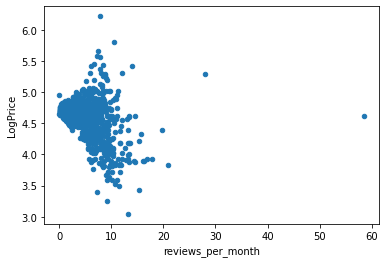

In [61]:
rev_per_month_to_LogPrice = df.groupby('reviews_per_month')['LogPrice'].mean().reset_index()
rev_per_month_to_LogPrice = pd.DataFrame(rev_per_month_to_LogPrice)
rev_per_month_to_LogPrice.plot.scatter(x='reviews_per_month', y='LogPrice');

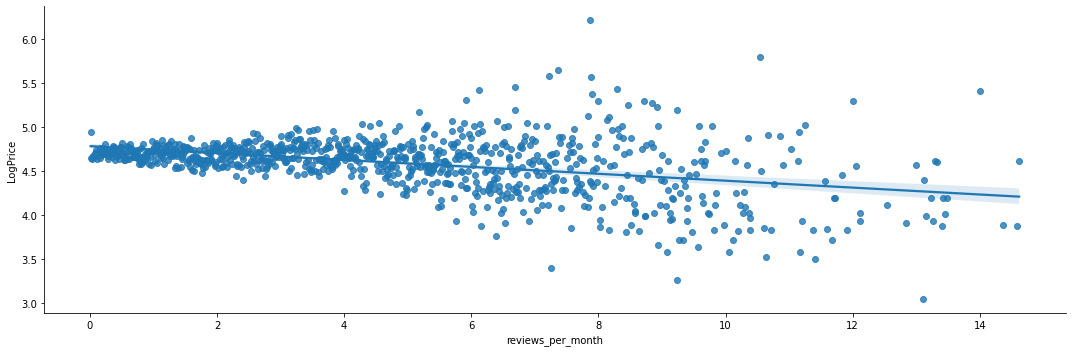

In [62]:
rev_per_month_to_LogPrice = rev_per_month_to_LogPrice.loc[rev_per_month_to_LogPrice['reviews_per_month'] < 15]
sns.lmplot(data=rev_per_month_to_LogPrice, x='reviews_per_month', y='LogPrice', aspect=3, height=5)
plt.show()

На основе графиков выше видим, что параметр reviews_per_month почти не оказывает влияние на целевую переменную LogPrice и т.к. в ней много пропусков, то данный признак можно исключить.

In [63]:
df.drop(columns ='reviews_per_month', inplace = True)

### Оценим качество примененных ранее методов кодирования категориальных переменных и выберем один из них

df_ordinary_enc - однозначное кодирование

df_count_enc - количественное кодирование

df_onehot_enc - one hot encoding

In [64]:
df_ordinary_enc.drop(columns ='reviews_per_month', inplace = True)
df_count_enc.drop(columns ='reviews_per_month', inplace = True)
df_onehot_enc.drop(columns ='reviews_per_month', inplace = True)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_ordinary_enc_train, X_ordinary_enc_test, y_ordinary_enc_train, y_ordinary_enc_test = train_test_split(df_ordinary_enc.drop(['price', 'LogPrice'], axis=1), df_ordinary_enc.LogPrice, \
                                                    test_size=0.3, random_state=42)

X_count_enc_train, X_count_enc_test, y_count_enc_train, y_count_enc_test = train_test_split(df_count_enc.drop(['price', 'LogPrice'], axis=1), df_count_enc.LogPrice, \
                                                    test_size=0.3, random_state=42)

X_onehot_enc_train, X_onehot_enc_test, y_onehot_enc_train, y_onehot_enc_test = train_test_split(df_onehot_enc.drop(['price', 'LogPrice'], axis=1), df_onehot_enc.LogPrice, \
                                                    test_size=0.3, random_state=42)


#### Нормализуем данные с помощью StandartScaler().

In [99]:
scaler = StandardScaler()

X_ordinary_enc_train_scaled = scaler.fit_transform(X_ordinary_enc_train)
X_ordinary_enc_test_scaled = scaler.transform(X_ordinary_enc_test)

X_count_enc_train_scaled = scaler.fit_transform(X_count_enc_train)
X_count_enc_test_scaled = scaler.transform(X_count_enc_test)

X_onehot_enc_train_scaled = scaler.fit_transform(X_onehot_enc_train)
X_onehot_enc_test_scaled = scaler.transform(X_onehot_enc_test)


#### Обучаем датасет, закодированный с помощью Ordinary encoder

In [100]:
model = LinearRegression()
model.fit(X_ordinary_enc_train_scaled, y_ordinary_enc_train)

y_train_pred_ordinary_enc = model.predict(X_ordinary_enc_train_scaled)
y_pred_ordinary_enc = model.predict(X_ordinary_enc_test_scaled)

print('Ordinary encoder train MAE = ', round(mean_absolute_error(y_ordinary_enc_train, y_train_pred_ordinary_enc),4 ))
print('Ordinary encoder test MAE = ', round(mean_absolute_error(y_ordinary_enc_test, y_pred_ordinary_enc),4 ))

print("Ordinary encoder test RMSE = %.4f" % mean_squared_error(y_ordinary_enc_test, y_pred_ordinary_enc, squared=False))
print("Ordinary encoder train RMSE = %.4f" % mean_squared_error(y_ordinary_enc_train, y_train_pred_ordinary_enc, squared=False))

Ordinary encoder train MAE =  0.3331
Ordinary encoder test MAE =  0.3344
Ordinary encoder test RMSE = 0.4379
Ordinary encoder train RMSE = 0.4372


#### Обучаем датасет, закодированный с помощью Count encoder

In [101]:
model.fit(X_count_enc_train_scaled, y_count_enc_train)

y_train_pred_count_enc = model.predict(X_count_enc_train_scaled)
y_pred_count_enc = model.predict(X_count_enc_test_scaled)

print('Count encoder train MAE = ', round(mean_absolute_error(y_count_enc_train, y_train_pred_count_enc),4 ))
print('Count encoder test MAE = ', round(mean_absolute_error(y_count_enc_test, y_pred_count_enc),4 ))

print("Count encoder test RMSE = %.4f" % mean_squared_error(y_count_enc_test, y_pred_count_enc, squared=False))
print("Count encoder train RMSE = %.4f" % mean_squared_error(y_count_enc_train, y_train_pred_count_enc, squared=False))

Count encoder train MAE =  0.4109
Count encoder test MAE =  0.4156
Count encoder test RMSE = 0.5268
Count encoder train RMSE = 0.5229


#### Обучаем датасет, закодированный с помощью OneHot encoder

In [102]:
model.fit(X_onehot_enc_train_scaled, y_onehot_enc_train)

y_train_pred_onehot_enc = model.predict(X_onehot_enc_train_scaled)
y_pred_onehot_enc = model.predict(X_onehot_enc_test_scaled)

print('OneHot encoder train MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_onehot_enc),4 ))
print('OneHot encoder test MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_onehot_enc),4 ))

print("OneHot encoder test RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_onehot_enc, squared=False))
print("OneHot encoder train RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_onehot_enc, squared=False))

OneHot encoder train MAE =  0.332
OneHot encoder test MAE =  0.3336
OneHot encoder test RMSE = 0.4357
OneHot encoder train RMSE = 0.4341


#### Исходя из показателей качества, можно сделать вывод о том, что лучше всего работает OneHot encoder.

#### Теперь подберем лучший вариант нормализации данных. Попробуем ещё два варианта: RobustScaler() и MinMaxScaler()

In [103]:
scaler = MinMaxScaler() 

X_onehot_enc_train_scaled = scaler.fit_transform(X_onehot_enc_train)
X_onehot_enc_test_scaled = scaler.transform(X_onehot_enc_test)


model.fit(X_onehot_enc_train_scaled, y_onehot_enc_train)

y_train_pred_onehot_enc = model.predict(X_onehot_enc_train_scaled)
y_pred_onehot_enc = model.predict(X_onehot_enc_test_scaled)


print('OneHot_encoder_MinMax_train_MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_onehot_enc),4 ))
print('OneHot_encoder_MinMax_test_MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_onehot_enc),4 ))

print("OneHot_encoder_MinMax_test_RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_onehot_enc, squared=False))
print("OneHot_encoder_MinMax_train_RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_onehot_enc, squared=False))

OneHot_encoder_MinMax_train_MAE =  0.3319
OneHot_encoder_MinMax_test_MAE =  0.3335
OneHot_encoder_MinMax_test_RMSE = 0.4357
OneHot_encoder_MinMax_train_RMSE = 0.4341


In [104]:
scaler = RobustScaler()

X_onehot_enc_train_scaled = scaler.fit_transform(X_onehot_enc_train)
X_onehot_enc_test_scaled = scaler.transform(X_onehot_enc_test)

model.fit(X_onehot_enc_train_scaled, y_onehot_enc_train)

y_train_pred_onehot_enc = model.predict(X_onehot_enc_train_scaled)
y_pred_onehot_enc = model.predict(X_onehot_enc_test_scaled)

print('OneHot_encoder_Robust_train_MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_onehot_enc),4 ))
print('OneHot_encoder_Robust_test_MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_onehot_enc),4 ))

print("OneHot_encoder_Robust_test_RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_onehot_enc, squared=False))
print("OneHot_encoder_Robust_train_RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_onehot_enc, squared=False))

OneHot_encoder_Robust_train_MAE =  0.3319
OneHot_encoder_Robust_test_MAE =  0.3334
OneHot_encoder_Robust_test_RMSE = 0.4357
OneHot_encoder_Robust_train_RMSE = 0.4341


#### Исходя из показателей качества RobustScaler() - лучше всего подходит для нашего случая. 

#### Теперь проверим, как повлиял созданный признак distance на качество.

In [105]:
X_onehot_enc_train_without_distance = X_onehot_enc_train.drop(columns ='distance', inplace = False)
X_onehot_enc_test_without_distance = X_onehot_enc_test.drop(columns ='distance', inplace = False)

In [106]:
scaler = RobustScaler()

X_onehot_enc_train_without_distance_scaled = scaler.fit_transform(X_onehot_enc_train_without_distance)
X_onehot_enc_test_without_distance_scaled = scaler.transform(X_onehot_enc_test_without_distance)

model.fit(X_onehot_enc_train_without_distance_scaled, y_onehot_enc_train)

y_train_pred_onehot_enc = model.predict(X_onehot_enc_train_without_distance_scaled)
y_pred_onehot_enc = model.predict(X_onehot_enc_test_without_distance_scaled)

print('Оценка качества без признака distance')

print('OneHot_encoder_Robust_train_MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_onehot_enc),4 ))
print('OneHot_encoder_Robust_test_MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_onehot_enc),4 ))

print("OneHot_encoder_Robust_test_RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_onehot_enc, squared=False))
print("OneHot_encoder_Robust_train_RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_onehot_enc, squared=False))

Оценка качества без признака distance
OneHot_encoder_Robust_train_MAE =  0.3375
OneHot_encoder_Robust_test_MAE =  0.3385
OneHot_encoder_Robust_test_RMSE = 0.4422
OneHot_encoder_Robust_train_RMSE = 0.4405


#### Видно, что без признака distance показатели качества ухудшились.

## Часть 3

#### RidgeCV

In [107]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 100)
model.fit(X_onehot_enc_train_scaled, y_onehot_enc_train)

y_pred_ridge = model.predict(X_onehot_enc_test_scaled)
y_train_pred_ridge = model.predict(X_onehot_enc_train_scaled)


print('RidgeCV train MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_ridge),4 ))
print('RidgeCV test MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_ridge),4 ))

print("RidgeCV train RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_ridge, squared=False))
print("RidgeCV test RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_ridge, squared=False))


RidgeCV train MAE =  0.3322
RidgeCV test MAE =  0.3336
RidgeCV train RMSE = 0.4344
RidgeCV test RMSE = 0.4359


#### LassoCV

In [108]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 100)
model.fit(X_onehot_enc_train_scaled, y_onehot_enc_train)

y_pred_lasso = model.predict(X_onehot_enc_test_scaled)
y_train_pred_lasso = model.predict(X_onehot_enc_train_scaled)

print('LassoCV train MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_lasso),4 ))
print('LassoCV test MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_lasso),4 ))

print("LassoCV train RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_lasso, squared=False))
print("LassoCV test RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_lasso, squared=False))

LassoCV train MAE =  0.5245
LassoCV test MAE =  0.5311
LassoCV train RMSE = 0.6414
LassoCV test RMSE = 0.6488


#### ElasticNetCV

In [111]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.5,  l1_ratio= 0.5)
model.fit(X_onehot_enc_train_scaled, y_onehot_enc_train)

y_pred_elastic = model.predict(X_onehot_enc_test_scaled)
y_train_pred_elastic = model.predict(X_onehot_enc_train_scaled)

print('ElasticNetCV train MAE = ', round(mean_absolute_error(y_onehot_enc_train, y_train_pred_elastic),4 ))
print('ElasticNetCV test MAE = ', round(mean_absolute_error(y_onehot_enc_test, y_pred_elastic),4 ))

print("ElasticNetCV train RMSE = %.4f" % mean_squared_error(y_onehot_enc_train, y_train_pred_elastic, squared=False))
print("ElasticNetCV test RMSE = %.4f" % mean_squared_error(y_onehot_enc_test, y_pred_elastic, squared=False))

ElasticNetCV train MAE =  0.5164
ElasticNetCV test MAE =  0.5223
ElasticNetCV train RMSE = 0.6346
ElasticNetCV test RMSE = 0.6414


### Вывод: лучшие показатели качества у LinearRegression(). Нужно поработать с гиперпараметрами, чтобы улучшить качество RidgeCV, LassoCV и ElasticNetCV.